In [1]:
import time
import warnings

from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit

In [2]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


# example Dataset -> Blobs 
(for other datasets look at the notebook "kmeans clustering_different dataset)

## Own implementation

In [3]:
n_samples=1000


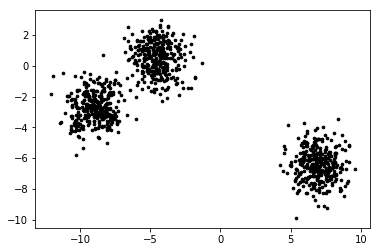

In [5]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=15)

points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)), 1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

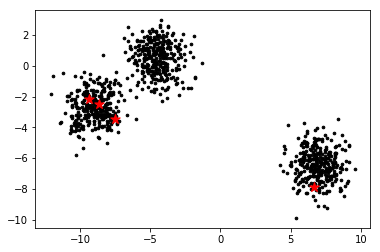

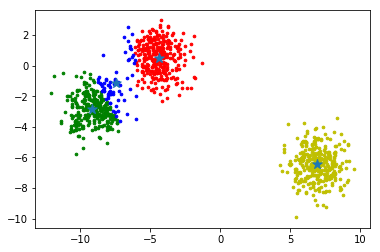

In [11]:
start_time = timeit.default_timer()


k=4
   
Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid
    
      
C=X[Indecies_centroid]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(C[:, 0], C[:, 1],marker='*',c='red',s=100)
    
clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old) # Konvergenz

while error.all() != 0:
    for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old)
        

   
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=100)
    


In [ ]:
# for the runtime comparison we used this code,where we are able to choose how often our code should run -> calculate average computationen time, more codes and plots in "runtime comparison"

times_to_repeat = 10

sum_runtime = 0

for i in range (times_to_repeat):
    

    start_time = timeit.default_timer()


    k=2
   
    Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid
    
      
    C=X[Indecies_centroid]
    
    clusters = np.zeros(len(X))
    C_old = np.zeros(C.shape)
    error = dist(C, C_old) # Konvergenz
    from copy import deepcopy

    while error.all() != 0:
        for i in range(len(X)):
                distances = dist(C,[X[i]])
                cluster = np.argmin(distances)
                clusters[i] = cluster
        C_old = deepcopy(C)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old)
        

    runtime= timeit.default_timer() - start_time
    
    sum_runtime= sum_runtime+runtime
    
    own_k2= sum_runtime/times_to_repeat
    
   
print(own_k2)


## scikit learn implementation

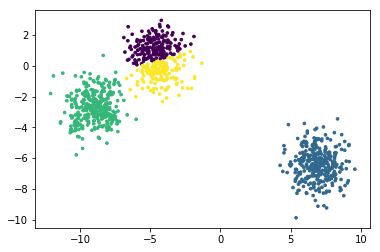

In [13]:
kmeans = KMeans(n_clusters=4).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans,s=7)

In [14]:
## for runtime comparison, look at "runtime comparison" notebook

times_to_repeat = 10

sum_runtime = 0

for i in range (times_to_repeat):
    

    start_time = timeit.default_timer()

    kmeans = KMeans(n_clusters=2).fit_predict(X)


    runtime= timeit.default_timer() - start_time
    
    sum_runtime= sum_runtime+runtime
    
    scikit_k2= sum_runtime/times_to_repeat
    
print(scikit_k2)
    

   



0.04143435999999383
